In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm      
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
import pandas as pd
zps = {'J':1587, 'H':1074, 'Ks':653,'F277W':427, 'F380M':253, 'F430M':194, 'F480M':150, 'F1000W': 34.9,'F1500W':18,'F2100W':8}

In [3]:
instru = 'micado'
datasets = []
for casedir in ['5', '1', '2','0']:
    for inc in ['0','30','60']:
        tablename = f'data{casedir}_inc{inc}'
        data = pd.read_csv(f"flux_tables/table_{instru}{casedir}_inc{inc}.csv")
        data = data.rename(columns={"CPD-bg":"flux1","antiCPD-bg":"flux1anti","mag CPD-antiCPD": "mag2", "mag CPD-bg": "mag1"})
        for col in ['mag1','mag2','SNR_CPD']:
            data[col] = pd.to_numeric(data[col],errors='coerce')
        # add a mag1anti column
        mag1anti =  [2.5 * np.log10(zps[data['filter'][i]]/data['flux1anti'][i]) for i in range(len(data))]
        data['mag1anti'] = mag1anti
        exec(f'{tablename} = data')
        exec(f'datasets.append({tablename})')
        
data0_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,J,0.000046,0.000003,0.000043,0.000042,1.320000e-06,18.92,22.70,1.03,nondetect,18.951102
1,10jup50au,H,0.000052,0.000003,0.000048,0.000048,1.090000e-07,18.37,24.98,1.00,nondetect,18.369893
2,10jup50au,Ks,0.000060,0.000005,0.000055,0.000053,2.000000e-06,17.69,21.28,1.04,nondetect,17.730698
3,5jup50au,J,0.000046,0.000003,0.000044,0.000043,2.700000e-07,18.90,24.42,1.01,nondetect,18.907718
4,5jup50au,H,0.000052,0.000003,0.000048,0.000050,-1.500000e-06,18.36,NaN,0.97,nondetect,18.330086
5,5jup50au,Ks,0.000059,0.000005,0.000055,0.000054,6.610000e-07,17.69,22.49,1.01,nondetect,17.706299
6,1jup50au,J,0.000051,0.000003,0.000049,0.000048,5.310000e-07,18.78,23.69,1.01,nondetect,18.793825
7,1jup50au,H,0.000059,0.000003,0.000056,0.000057,-1.030000e-06,18.21,NaN,0.98,nondetect,18.187824
8,1jup50au,Ks,0.000075,0.000005,0.000070,0.000065,5.200000e-06,17.43,20.25,1.08,nondetect,17.511702
9,1sat50au,J,0.000056,0.000003,0.000053,0.000051,1.650000e-06,18.69,22.46,1.03,nondetect,18.721924


In [30]:
data1_inc0

,model,filter,CPD tot,Background,CPD-bg,antiCPD-bg,CPD-antiCPD,mag1,mag2,SNR_CPD,flag
0,10jup50au,J,0.000106,0.000003,0.000104,0.000045,0.000059,17.96,18.57,2.33,detect
1,10jup50au,H,0.000488,0.000003,0.000485,0.000052,0.000433,15.86,15.99,9.35,detect
2,10jup50au,Ks,0.004860,0.000005,0.004850,0.000062,0.004790,12.82,12.84,78.85,detect
3,5jup50au,J,0.000139,0.000003,0.000136,0.000045,0.000092,17.66,18.09,3.06,detect
4,5jup50au,H,0.000291,0.000003,0.000287,0.000052,0.000235,16.43,16.65,5.52,detect
5,5jup50au,Ks,0.000362,0.000005,0.000357,0.000065,0.000292,15.66,15.87,5.52,detect
6,1jup50au,J,0.000190,0.000003,0.000188,0.000045,0.000143,17.32,17.61,4.20,detect
7,1jup50au,H,0.000229,0.000003,0.000225,0.000052,0.000173,16.70,16.98,4.31,detect
8,1jup50au,Ks,0.000246,0.000005,0.000241,0.000065,0.000176,16.08,16.42,3.72,detect
9,1sat50au,J,0.000055,0.000003,0.000052,0.000045,0.000007,18.71,20.87,1.16,asymm


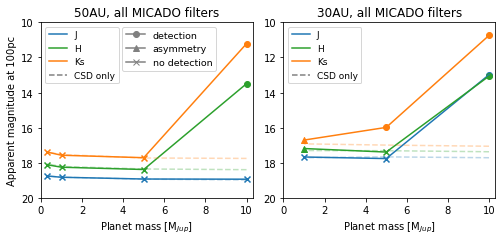

In [7]:
# mass vs mag, diff filters
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.mag1[i:12+i:3].values, data0_inc0.mag1anti[i:12+i:3], data5_inc0.flag[i:12+i:3].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.mag1[12+i::3].values, data0_inc0.mag1anti[12+i::3], data5_inc0.flag[12+i::3].values
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all MICADO filters')
    plt.xlim((0,10.3))
    plt.ylim((20,10))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 9})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)
                       ]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1, bbox_to_anchor=(0.85,1),prop={'size': 9.5})
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/micado_mass_mag_filterlines.png', bbox_inches='tight', dpi=200)

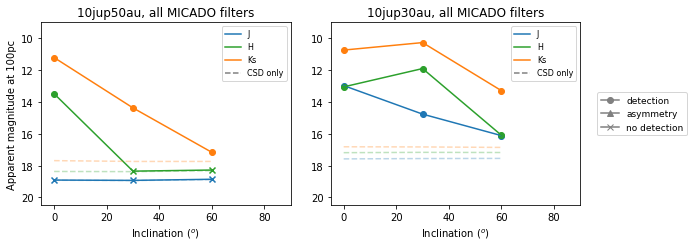

In [35]:
# inc vs mag, diff filters, 10jup
colors= ['tab:blue','tab:green','tab:orange','tab:red']
titles= ['10jup50au','10jup30au','5jup30au']
plt.figure(figsize=(10,3.8))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y = [0,30,60], [data5_inc0.mag1[i],data5_inc30.mag1[i],data5_inc60.mag1[i]]
            y0 = [data0_inc0.mag1[i],data0_inc30.mag1[i],data0_inc60.mag1[i]]
            flags =  [data5_inc0.flag[i],data5_inc30.flag[i],data5_inc60.flag[i]]
        elif sub==1:
            x, y = [0,30,60], [data5_inc0.mag1[i+12],data5_inc30.mag1[i+12],data5_inc60.mag1[i+12]]
            y0 = [data0_inc0.mag1[i+12],data0_inc30.mag1[i+12],data0_inc60.mag1[i+12]]
            flags =  [data5_inc0.flag[i+12],data5_inc30.flag[i+12],data5_inc60.flag[i+12]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y, label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all MICADO filters')
    plt.xlim((-5,90))
    plt.ylim((20.5,9))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==1:
        legend2 = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5),prop={'size': 9})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=2)
plt.savefig('../simtools/analysis_plots/micado_inc_mag_filterlines.png', bbox_inches='tight', dpi=200)

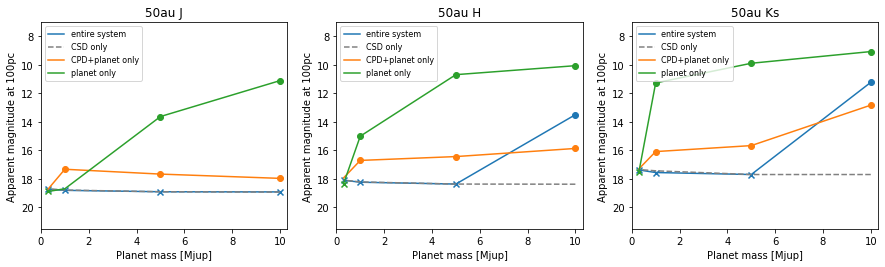

In [36]:
# mass vs magnitude diff cases 50au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(15,3.8))

for sub in range(3):
    plt.subplot(1,3,sub+1)
    x = [10,5,1,0.3]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[sub:12+sub:3].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[sub:12+sub:3].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8},loc=2)
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((21.5, 7))
plt.savefig('../simtools/analysis_plots/micado_mass_mag_cases_50au.png', bbox_inches='tight', dpi=200)

(22.0, 10.0)

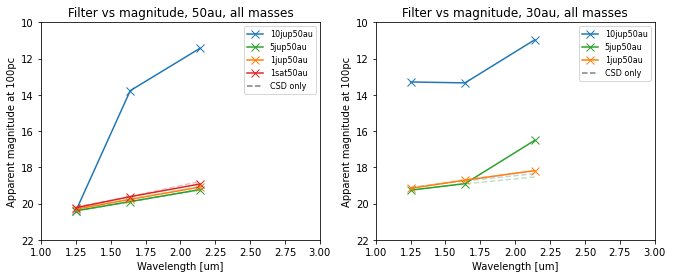

In [18]:
# filter vs mag, diff masses
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
for i in range(4):
    x, y = [1.25,1.64,2.14], data.mag1[3*i:3*i+3]
    plt.plot(x, y, marker='x', markersize=8,label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0.mag1[3*i:3*i+3], alpha=0.3, color=colors[i], linestyle='--')
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 50au, all masses')
plt.xlim((1,3))
plt.ylim((22,10))
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
#plt.axhline(y=i, color='gray', linestyle='--')
    
plt.subplot(1,2,2)
for i in range(3):
    x, y = [1.25,1.64,2.14], data.mag1[3*i+12:3*i+15]
    plt.plot(x, y, marker='x',markersize=8, label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0.mag1[3*i+12:3*i+15], alpha=0.3, color=colors[i], linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 30au, all masses')
plt.xlim((1,3))
plt.ylim((22,10))

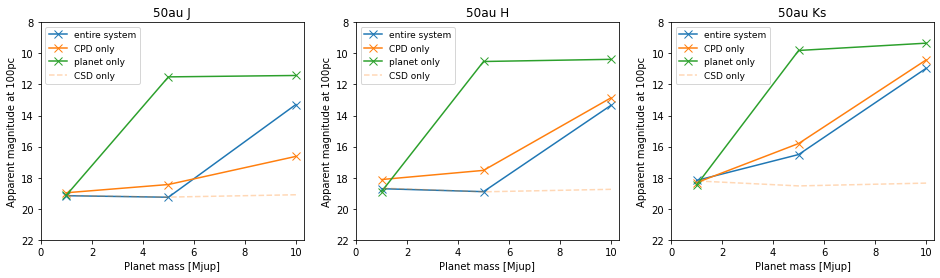

In [24]:
plt.figure(figsize=(16,4))
for j in range(3):
    plt.subplot(1,3,j+1)
    x = [10,5,1]
    plt.plot(x, data.mag1[12+j::3], marker='x',markersize=8, label='entire system')
    plt.plot(x, data1.mag1[12+j::3], marker='x',markersize=8, label='CPD only')
    plt.plot(x, data2.mag1[12+j::3], marker='x',markersize=8, label='planet only')
    plt.plot(x, data0.mag1[12+j::3], alpha=0.3, color=colors[i], linestyle='--', label='CSD only')

    plt.legend(prop={'size': 9})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][j])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

In [6]:
table=[datasets[0]['model'].values, datasets[0]['filter'].values]
for n in range(len(datasets)):
    col=[]
    for i in range(len(datasets[n])):
        if n > 8:
            a = datasets[n]['mag1anti'][i]
            col.append(f'{a:.2f}')
        else:
            a = datasets[n]['mag2'][i]
            if datasets[n]['flag'][i] == 'sat':
                col.append(f'<{a:.2f}')
            elif datasets[n]['flag'][i] == 'detect':
                col.append(f'{a:.2f}')
            else:
                col.append('/')
    table.append(col)
tabledf = pd.DataFrame.from_records(table).T
tabledf.columns=['model','filter','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$']
tabledf.to_csv(f'./flux_tables/{instru}_combined.csv')
tabledf

,model,filter,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$
0,10jup50au,J,/,/,/,18.57,18.07,17.46,11.10,11.10,11.12,18.95,18.98,18.88
1,10jup50au,H,13.50,/,/,15.99,16.45,16.19,10.05,10.08,10.08,18.37,18.39,18.30
2,10jup50au,Ks,11.22,14.43,18.14,12.84,14.38,15.28,9.06,9.08,9.07,17.73,17.79,17.78
3,5jup50au,J,/,/,/,18.09,17.71,17.39,13.63,13.61,14.80,18.91,18.95,18.84
4,5jup50au,H,/,/,/,16.65,16.41,16.22,10.68,10.65,11.12,18.33,18.36,18.27
5,5jup50au,Ks,/,/,/,15.87,15.71,15.71,9.88,9.81,9.94,17.71,17.77,17.76
6,1jup50au,J,/,/,/,17.61,17.39,17.64,/,/,/,18.79,18.83,18.72
7,1jup50au,H,/,/,/,16.98,16.75,16.48,15.05,15.04,14.98,18.19,18.22,18.14
8,1jup50au,Ks,/,/,/,16.42,16.62,16.34,11.26,11.24,11.29,17.51,17.57,17.58
9,1sat50au,J,/,/,/,/,19.52,17.99,/,/,/,18.72,18.73,18.62
